<a href="https://colab.research.google.com/github/IsabelaAthayde/fuels-price-analysis/blob/main/trabalho_em_grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red" size="7rem"> Participantes: </font>

* <font color="red" size="5rem">Ilma</font>
* <font color="red" size="5rem"> Isabela</font>
* <font color="red" size="5rem">Debora</font>
* <font color="red" size="5rem">Gabriel</font>
* <font color="red" size="5rem">Albino</font>


<Font size='15rem' color="lightgreen" /> <center>Projeto em Grupo</center>

In [258]:
# Adicione  todas as importações aqui

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors

# Para criação de mapa
import geopandas as gpd

# Verifique se você já possui os arquivos antes de continuar

 1. <font color="green" size="4rem"/> Arquivos do df de preços

In [259]:
import os
from google.colab import files

# Verificar se os arquivos já existem
arquivo_11 = '/content/precos-gasolina-etanol-11.csv'
arquivo_12 = '/content/precos-gasolina-etanol-12.csv'

if not (os.path.exists(arquivo_11) and os.path.exists(arquivo_12)):
    print("Seu colab não possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.\n")

    # Se o usuário não tiver os arquivos, fornecer links para download
    print("Clique nos links abaixo para baixar os arquivos:")

    link_11 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-11.csv'
    link_12 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-12.csv'

    print(f"1. Baixar 'precos-gasolina-etanol-11': {link_11}")
    print(f"2. Baixar 'precos-gasolina-etanol-12': {link_12}")
    print('\n-------------------------------------------\n')
    print('Ou Caso já possua os arquivos na sua máquina, selecione os arquivos:')

    uploaded = files.upload()
    # Após o upload, os arquivos podem ser manipulados no ambiente do Colab
else:
    print("Você já possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.")


Você já possui os arquivos 'precos-gasolina-etanol-11' e 'precos-gasolina-etanol-12'.


2. <font color="green" size="4rem"/>  Arquivo para o mapa do Brasil



In [260]:
import os
from google.colab import files

# Verificar se os arquivos já existem
arquivos = ['/content/estados_2010.dbf', '/content/estados_2010.prj', '/content/estados_2010.qpj', '/content/estados_2010.shp', '/content/estados_2010.shx']

# Verificar se todos os arquivos existem
todos_existem = all(os.path.exists(arquivo) for arquivo in arquivos)

if (todos_existem):
    print("Você possuí todos os arquivos necessários no colab para rodar os mapas")
else:
  for arq in arquivos:
    if not (os.path.exists(arq)):
        print("Você não possuí o arquivo", arq)

  print(f"\n1. Por favor acesse o link do drive e baixe os arquivos que faltam ")
  print('https://docs.google.com/file/d/0B__Rg9h09RtfQU9jbEpxcW9xREk/edit?pli=1')
  print(f"2. Extraia os arquivos do zip/winrar, pegue os arquivos da pasta estados_2010 e o coloque todos eles dentro do colab")
  print('-------------------------------------------')



Você possuí todos os arquivos necessários no colab para rodar os mapas


# Recebendo os arquivos reais e concatenando

In [261]:
# Arquivos dos dois últimos meses de 2023
nov = pd.read_csv('precos-gasolina-etanol-11.csv', sep=';')
dez = pd.read_csv('precos-gasolina-etanol-12.csv', sep=';')

# Junta os dois DataFrames
df = pd.concat([nov, dez])

# Visualize as primeiras linhas do DataFrame
display(df)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,01/11/2023,"4,88",NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,01/11/2023,"6,19",NaN,R$ / litro,VIBRA
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA ADITIVADA,01/11/2023,"6,29",NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49448,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,GASOLINA,29/12/2023,"5,79",NaN,R$ / litro,IPIRANGA
49449,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,29/12/2023,"3,79",NaN,R$ / litro,IPIRANGA
49450,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA,29/12/2023,"5,49",NaN,R$ / litro,RODOIL
49451,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA ADITIVADA,29/12/2023,"5,59",NaN,R$ / litro,RODOIL


# Tratamentos

- <font color = "darkblue"> Removendo nulos da coluna valor de compra

In [262]:
df.drop(columns=['Valor de Compra'], inplace=True)

- <font color = "darkblue"> Transformando a data de object para datetime

In [263]:
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')

- <font color = "darkblue"> mudar valor de venda object type para float

In [264]:
df['Valor de Venda'] = df['Valor de Venda'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

In [265]:
# Converter a coluna 'Valor de Venda' para tipo numérico (float)
df['Valor de Venda'] = pd.to_numeric(df['Valor de Venda'], errors='coerce')

- <font color = "darkblue"> Verificando valores nulos em todo o DataFrame
<!-- -!Visualizar boxplots é uma maneira eficaz de identificar outliers -->

- <font color = "darkblue">Verificar valores nulos em todo o DataFrame

In [266]:

valores_nulos_totais = df.isnull()

# Exibir o DataFrame de booleanos (True para valores nulos, False para valores não nulos)
print(valores_nulos_totais)

       Regiao - Sigla  Estado - Sigla  Municipio  Revenda  CNPJ da Revenda  \
0               False           False      False    False            False   
1               False           False      False    False            False   
2               False           False      False    False            False   
3               False           False      False    False            False   
4               False           False      False    False            False   
...               ...             ...        ...      ...              ...   
49448           False           False      False    False            False   
49449           False           False      False    False            False   
49450           False           False      False    False            False   
49451           False           False      False    False            False   
49452           False           False      False    False            False   

       Nome da Rua  Numero Rua  Complemento  Bairro    Cep  Pro

- <font color = "darkblue">Verificando se há duplicatas

In [267]:
#Se todas as entradas são False, isso significa que não há duplicatas no DataFrame.
duplicatas = df.duplicated()
print(duplicatas)

0        False
1        False
2        False
3        False
4        False
         ...  
49448    False
49449    False
49450    False
49451    False
49452    False
Length: 101996, dtype: bool


-----------------------------------------------------------

# <font color = "lightgreen"> 1- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou aumento?

Todos os três tipos de combutíveis apresentaram uma tendência de queda durante os dois meses analisados.

* O preço da gasolina durante esse tempo foi em média 5,67 reais no início de novembro para 5,61 reais no final de dezembro, sua queda foi de -1,15%.

* O preço da gasolina aditivada durante esse período foi em média 5,85 reais no início de novembro para 5,80 reais no final de dezembro, sua queda foi de -0,82%.

* O preço da etanol durante esse tempo foi em média 3,88 reais no início de novembro para 3,72 reais no final de dezembro, sua queda foi de -4,05%.

In [268]:
# Defini a primeira semana de novembro como semana 1
df['Semana'] = (df['Data da Coleta'].dt.isocalendar().week - 44) % 52 + 1

# Cálculo da média semanal para cada produto
media_semanal = df.groupby(['Produto', 'Semana'])['Valor de Venda'].mean().reset_index()

# Junta os dados dos três produtos em um único dataframe
dados_semanais = pd.concat([media_semanal[media_semanal['Produto'] == produto] for produto in ['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL']])
dados_semanais.sort_index(ascending=True, inplace=True)

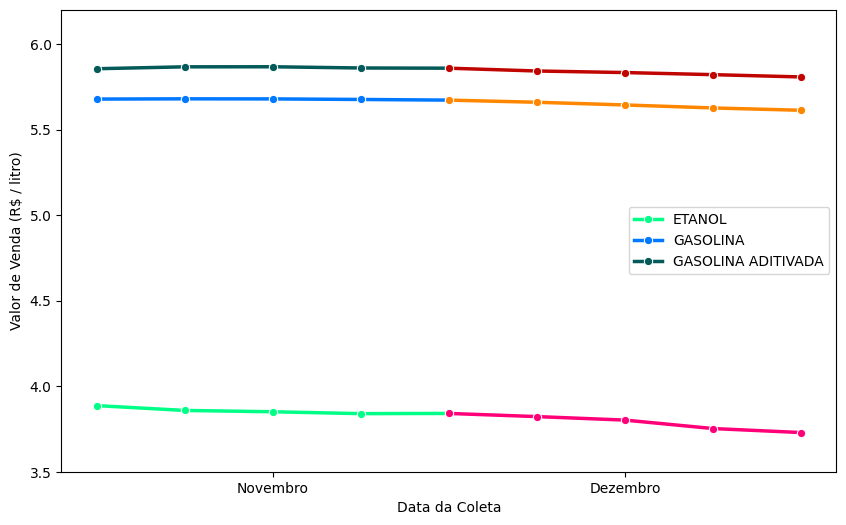

In [269]:
# Dividi os dados como antes e depois da quinta semana
df_preco_alto = dados_semanais[dados_semanais['Semana'] <= 5]
df_preco_baixo = dados_semanais[dados_semanais['Semana'] >= 5]


# Paletas personalizadas
nov_palette = ['#00FF87','#0078FF','#045959']
dez_palette = ['#FF0078','#FF8700','#C00500']

# Remove duplicatas geradas na mudança de cor
produtos = df_preco_alto['Produto'].unique()

plt.figure(figsize=(10, 6))

for i, produto in enumerate(produtos):
    sns.lineplot(x='Semana', y='Valor de Venda', data=df_preco_alto[df_preco_alto['Produto'] == produto], color=nov_palette[i], label=produto, linewidth=2.5, marker='o')
    sns.lineplot(x='Semana', y='Valor de Venda', data=df_preco_baixo[df_preco_baixo['Produto'] == produto], color=dez_palette[i], label=None, linewidth=2.5, marker='o')

# Altera os rótulos do eixo x pra meses
plt.xticks(ticks=[3, 7], labels=['Novembro', 'Dezembro'])
plt.xlabel('Data da Coleta')
plt.ylabel('Valor de Venda (R$ / litro)')

# Defini o range min e max
plt.ylim(3.5, 6.2)
plt.show()

# <font color = "lightgreen"> 2- Qual o preço médio da gasolina e do etanol nesses dois meses?

O preço médio do etanol teve uma queda de aproximadamente 1.82%, indicando uma diminuição mais acentuada nos valores médios durante os dois meses.

A gasolina, por outro lado, apresentou uma queda mais leve na faixa de 0.70% nos preços médios.

Ou seja, o etanol teve uma variação percentual mais significativa em comparação com a gasolina nos dois meses, o que pode indicar influências específicas para o etanol durante esse período.

In [270]:
gas_nov = df[(df['Produto'] == 'GASOLINA') & (df['Data da Coleta'] >= '2023/11/01') & (df['Data da Coleta'] <= '2023/11/30') ]
gas_dez = df[(df['Produto'] == 'GASOLINA') & (df['Data da Coleta'] >= '2023/12/01') & (df['Data da Coleta'] <= '2023/12/30') ]

eta_nov = df[(df['Produto'] == 'ETANOL') & (df['Data da Coleta'] >= '2023/11/01') & (df['Data da Coleta'] <= '2023/11/30') ]
eta_dez = df[(df['Produto'] == 'ETANOL') & (df['Data da Coleta'] >= '2023/12/01') & (df['Data da Coleta'] <= '2023/12/30') ]

# Calculando a média
media_gas_nov = gas_nov['Valor de Venda'].mean()
media_gas_dez = gas_dez['Valor de Venda'].mean()

media_eta_nov = eta_nov['Valor de Venda'].mean()
media_eta_dez = eta_dez['Valor de Venda'].mean()

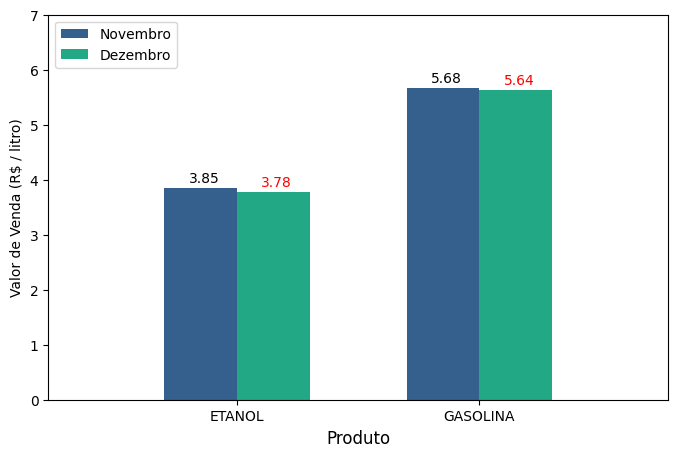

In [271]:
# Defini os valores a serem usados no eixo x
produtos = ['ETANOL', 'GASOLINA']

# Defini a largura das barras
bar_largura = 0.30

# Defini a posição das barras de acordo com a largura predefinida
bar_m11 = np.arange(len(produtos))
bar_m12 = [x + bar_largura for x in bar_m11]

plt.figure(figsize=(8, 5))

# Cria o grafico de barras
plt.bar(bar_m11, [media_eta_nov, media_gas_nov], color=cm.viridis(0.3), width=0.30, label='Novembro')
plt.bar(bar_m12, [media_eta_dez, media_gas_dez], color=cm.viridis(0.6), width=0.30, label='Dezembro')

# Adiciona os valores nas barras
for i in range(len(bar_m11)):
    plt.text(x = bar_m11[i]-0.05 , y = [media_eta_nov, media_gas_nov][i]+0.1, s = format([media_eta_nov, media_gas_nov][i], '.2f'), size = 10)
    plt.text(x = bar_m12[i]-0.05 , y = [media_eta_dez, media_gas_dez][i]+0.1, s = format([media_eta_dez, media_gas_dez][i], '.2f'), size = 10, color='red')

# Adiciona os rótulos ao eixo x
plt.xlabel('Produto', fontsize=12)
plt.xticks([r + bar_largura/2 for r in range(len(produtos))], produtos)

# Adiciona o rótulo ao eixo y
plt.ylabel('Valor de Venda (R$ / litro)')
plt.ylim(0, 7)

# Adiciona margem no gráfico
plt.margins(x=0.3, y=0.3)

# Cria a legenda
plt.legend(loc='upper left')

# Mostra o gráfico
plt.show()


# <font color = "lightgreen"> 3- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?


O Mapa de calor feito com geopandas com base no mapa do Brasil.

<font color="red" size="3rem">Para prosseguir serão necessários alguns arquivos da pasta estados_2010 que foram pedidos no tópico de **Verificação**</font>

In [272]:
# Carrega o shapefile/ modelo do brasil e seus estados
brasil = gpd.read_file('estados_2010.shp')

df_media = df.copy()

# Renomeia as coluna de Estado para que não haja conflito entre dataframe
df_media = df_media.rename(columns={'Estado - Sigla': 'eSigla'})
brasil = brasil.rename(columns={'sigla': 'eSigla'})

# Agrupa por Sigla de Estado e Produto
df_media = df_media.groupby(['eSigla', 'Produto'])['Valor de Venda'].mean()

# Transforma a Series em dataframe
df_media = df_media.to_frame()

# Reseta o index
df_media.reset_index(inplace=True)

# Defini os indexes como eSigla
df_media = df_media.set_index('eSigla')
brasil = brasil.set_index('eSigla')

In [273]:
# Filtra o dataFrame para incluir apenas 'Gasolina'
df_media_gasolina = df_media[df_media['Produto'] == 'GASOLINA']

# Filtra o dataFrame para incluir apenas 'Etanol'
df_media_etanol = df_media[df_media['Produto'] == 'ETANOL']

# Uni os dois DataFrames separadamente com o seu próprio mapa do Brasil
brasil_gasolina = brasil.join(df_media_gasolina)
brasil_etanol = brasil.join(df_media_etanol)

In [274]:
# Dicionário com os ajustes individuais na posição dos Estados que estavam dispersos
# Cordenada padrão (-5, 2). Cordenada abaixo é usada pra o cálculo, ex: PA -> (-5-1 = -6, 2-1 = 1)
ajustes = {
    'PA': (-1, -1),
    'AM': (-3, -1),
    'AP': (0, -0.4),
    'RR': (-0.2, -0.2),
    'SP': (0, 0.5),
    'MA': (0, 1),
    'TO': (0, -1),
    'PI': (-0.5, -1),
    'PB': (1, 0),
    'AL': (1, 0),
    'BA': (1, 1),
    'MT': (-0.5, -0.5),
    'DF': (-0.2, 0.7),
    'AC': (1.4,-0.9)
}

In [275]:
# Adiciona as siglas dos estados
def adicionar_sigla(pontos_centrais, index, top_5, ax):
# Pega o ponto e a sigla
  for ponto, sigla in zip(pontos_centrais, index):
      # Só escrevem as siglas se forem parte do top 5
      if sigla in top_5:
          # Inicia os ajustes das coordenadas, fazendo os cálculos necessários
          ajuste = ajustes.get(sigla, (0, 0))
          ax.annotate(sigla, xy=(ponto.x + ajuste[0], ponto.y + ajuste[1]), xytext=(-5, -2), textcoords="offset points")

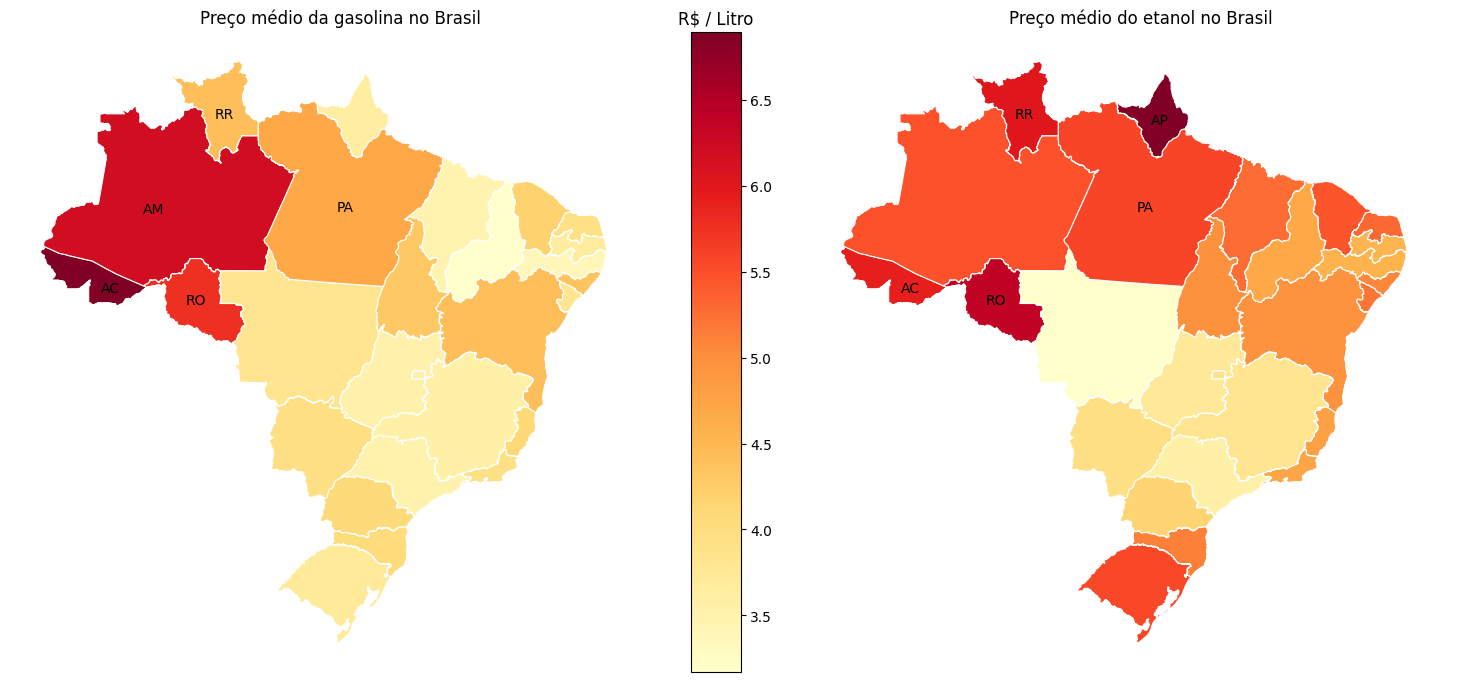

In [276]:
# Ajusta o tamanho dos mapas do Brasil
fig = plt.figure(figsize=(25, 8))

# Cria os eixos para os dois mapas
ax1 = fig.add_axes([0.13, 0.1, 0.4, 0.8])  # 1º- mapa para gasolina
ax2 = fig.add_axes([0.45, 0.1, 0.4, 0.8])  # 2º- mapa para etanol

# Cria um terceiro eixo para a barra de cores
cax = fig.add_axes([0.47, 0.1, 0.02, 0.8])

# Armazena os pontos centrais aproximados dos Estados
pontos_centrais = brasil.geometry.representative_point()

# Plota o mapa da gasolina -1º
brasil_gasolina.plot(column='Valor de Venda', cmap='YlOrRd', linewidth=0.8, edgecolor='white', ax=ax1, legend=False)

# Plota o mapa para etanol - 2º
brasil_etanol.plot(column='Valor de Venda', cmap='YlOrRd', linewidth=0.8, edgecolor='white', ax=ax2, legend=False)

# Seleciona os 5 estados com os maiores valores e chama a função de adicionar sigla
top_5_estados_gas = df_media_gasolina.sort_values('Valor de Venda', ascending=False).head(5).index.tolist()
adicionar_sigla(pontos_centrais, brasil.index, top_5_estados_gas, ax1)

# Ordena os valores de etanol, seleciona os top 5 estados e chama a função
top_5_estados_eta = df_media_etanol.sort_values('Valor de Venda', ascending=False).head(5).index.tolist()
adicionar_sigla(pontos_centrais, brasil.index, top_5_estados_eta, ax2)

# Oculta os valores em x e y dos mapas 1 e 2
ax1.axis('off')
ax2.axis('off')

ax1.set_title('Preço médio da gasolina no Brasil')
ax2.set_title('Preço médio do etanol no Brasil')

# Criação da barra medidora de calor

# Fixa o mínimo e máximo
norm = mcolors.Normalize(vmin=df_media['Valor de Venda'].min(), vmax=df_media['Valor de Venda'].max())

# Escolhe a paleta entre tons amarelados e avermelhados
cmap = plt.get_cmap('YlOrRd')

# Instância necessária para a criação da barra no centro
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig.colorbar(sm, cax=cax, orientation='vertical')

# Título da barra
cax.set_title('R$ / Litro')

plt.show()

# <font color='#0000CD'>4. Qual o preço médio da gasolina e do etanol por estado?

- <font color = "darkblue">O código usa a função groupby para agrupar os dados pelo estado (representado pela sigla do estado) e pelo tipo de produto (gasolina, etanol ou gasolina aditivada).
- <font color = "darkblue">Em seguida, calcula a média dos preços de venda para cada grupo.
- <font color = "darkblue">O código utiliza o módulo seaborn para criar um gráfico de barras que mostra o preço médio de venda por estado e produto.
- <font color = "darkblue">O eixo x representa os estados, o eixo y representa o preço médio de venda, e as barras são diferenciadas por cor de acordo com o tipo de produto.



DataFrame com Preço Médio por Estado e Produto:
       Valor de Venda
count       81.000000
mean         5.307133
std          0.876685
min          3.170450
25%          4.551735
50%          5.649198
75%          5.858007
max          6.894907


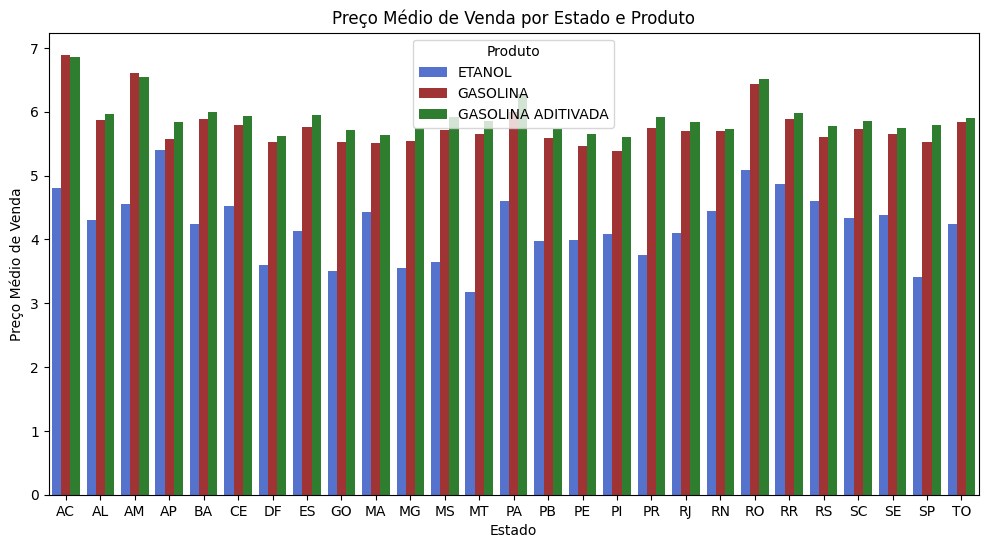

In [277]:
# Agrupa por Estado e Produto e calcula a média
preco_medio = df.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean()

# Converte o resultado de volta para DataFrame para facilitar a manipulação
preco_medio_df = preco_medio.reset_index()

# Visualiza o DataFrame resultante
print("DataFrame com Preço Médio por Estado e Produto:")
print(preco_medio_df.describe())

%matplotlib inline

# Criar um gráfico de barras usando seaborn com cores específicas
plt.figure(figsize=(12, 6))
sns.barplot(x='Estado - Sigla', y='Valor de Venda', hue='Produto', data=preco_medio_df,
            palette={'GASOLINA': 'firebrick', 'ETANOL': 'royalblue', 'GASOLINA ADITIVADA': 'forestgreen'})
plt.title('Preço Médio de Venda por Estado e Produto')
plt.xlabel('Estado')
plt.ylabel('Preço Médio de Venda')
plt.show()

- <font color = "darkblue">Média do valor do ETANOL: 3.84 (onde temos o municipio de SAO PAULO - Valor: 2.69 e SANTAREM  como valor de 6.6)

- <font color = "darkblue">Média do valor da GASOLINA: 5.67 (onde temos o municipio de SAO CARLOS - Valor: 4.49 e o municipio de TEFE - Valor: 7.7
)
- <font color = "darkblue">Média do valor da GASOLINA ADITIVADA: 5.85 (onde temos o municipio de ASSIS - Valor: 4.69 e o municipio de  CAMPINAS - Valor: 9.79

#O código abaixo agrupa os dados pelo estado e produto, calcula a média dos valores de venda para cada grupo e, em seguida, organiza as informações em um DataFrame para facilitar a visualização.

In [278]:
# Criando um DataFrame com os valores médios
media_por_estado = df.groupby(['Estado - Sigla', 'Produto'])['Valor de Venda'].mean().unstack()

# Selecionando apenas as colunas relevantes
media_por_estado = media_por_estado[['ETANOL', 'GASOLINA', 'GASOLINA ADITIVADA']]

# Renomeando as colunas
media_por_estado.columns = ['Valor Médio Etanol', 'Valor Médio Gasolina', 'Valor Médio Gasolina Aditivada']

# Exibindo o resultado
print(media_por_estado)

                Valor Médio Etanol  Valor Médio Gasolina  \
Estado - Sigla                                             
AC                        4.808250              6.894907   
AL                        4.306241              5.868059   
AM                        4.551735              6.601109   
AP                        5.397500              5.568994   
BA                        4.238109              5.888282   
CE                        4.528349              5.795289   
DF                        3.600460              5.532317   
ES                        4.138996              5.764608   
GO                        3.503608              5.532579   
MA                        4.424092              5.512465   
MG                        3.553628              5.539809   
MS                        3.648490              5.709834   
MT                        3.170450              5.649198   
PA                        4.606010              6.001357   
PB                        3.980656      

#Este código gera dois boxplots. O primeiro mostra a distribuição dos preços de venda por produto, enquanto o segundo mostra a distribuição por estado

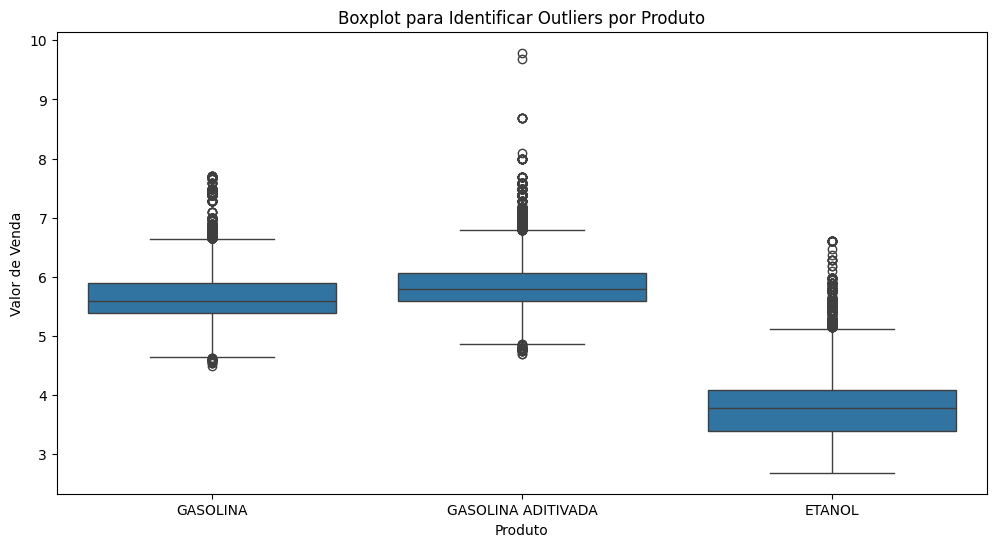

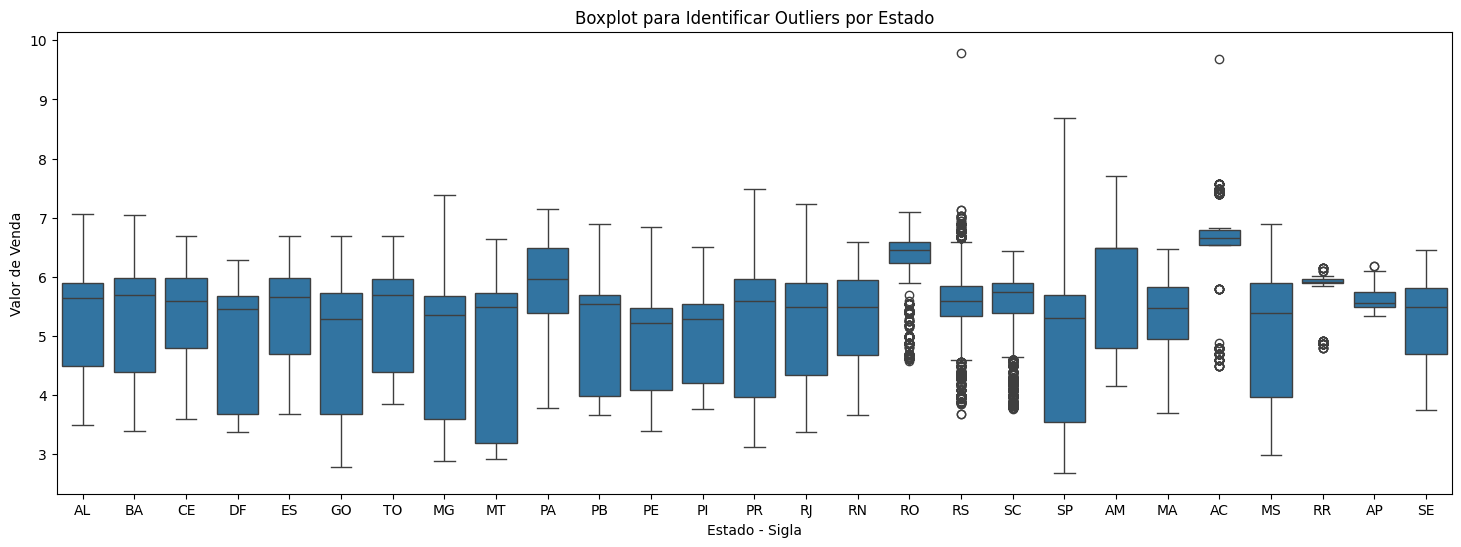

In [279]:
# Revisão dos Dados
df['Valor de Venda'] = pd.to_numeric(df['Valor de Venda'], errors='coerce')  # Converta para tipo numérico

# Resetando o índice
df.reset_index(drop=True, inplace=True)

# Boxplot para visualizar outliers por Produto
plt.figure(figsize=(12, 6))
sns.boxplot(x='Produto', y='Valor de Venda', data=df)
plt.title('Boxplot para Identificar Outliers por Produto')
plt.show()

# Boxplot para visualizar outliers por Estado
plt.figure(figsize=(18, 6))
sns.boxplot(x='Estado - Sigla', y='Valor de Venda', data=df)
plt.title('Boxplot para Identificar Outliers por Estado')
plt.show()

#<font color='#0000CD'>5. Qual o município que possui o menor preço para a gasolina e para o etanol?

- <font color = "darkblue">O código começa ajustando os dados para garantir que a coluna 'Valor de Venda' seja do tipo numérico.
- <font color = "darkblue">Em seguida, encontra os menores preços de venda para gasolina, gasolina aditivada e etanol em cada município.
- <font color = "darkblue">Por fim, cria um gráfico de barras empilhadas para visualizar esses menores preços, destacando cada produto com cores diferentes.

Menor preço para a gasolina: SAO CARLOS - Valor: 4.49
Menor preço para a gasolina aditivada: ASSIS - Valor: 4.69
Menor preço para o etanol: SAO PAULO - Valor: 2.69


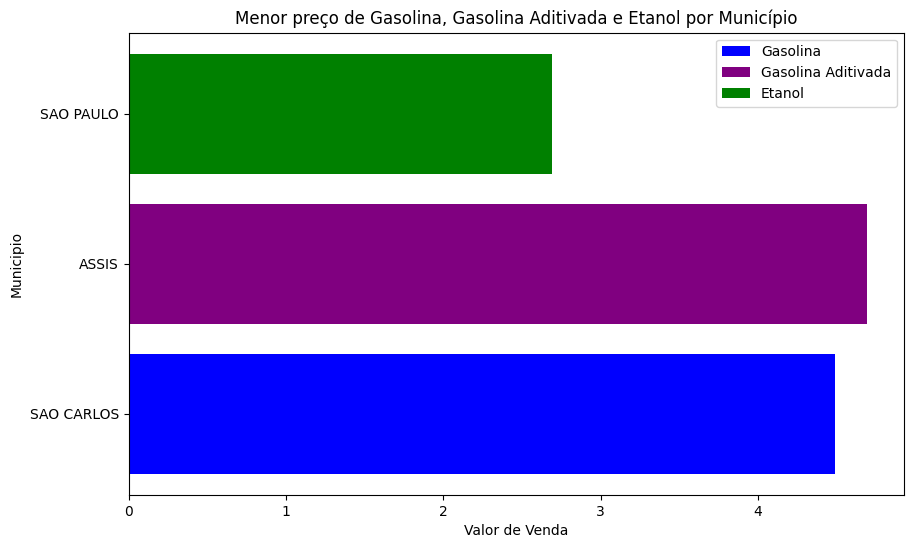

In [280]:
# Converter a coluna 'Valor de Venda' para tipo numérico (float)
df['Valor de Venda'] = pd.to_numeric(df['Valor de Venda'], errors='coerce')

# Criar DataFrames para os menores preços
menor_preco_gasolina_df = df.loc[df['Produto'] == 'GASOLINA', ['Municipio', 'Valor de Venda']].nsmallest(1, 'Valor de Venda')
menor_preco_etanol_df = df.loc[df['Produto'] == 'ETANOL', ['Municipio', 'Valor de Venda']].nsmallest(1, 'Valor de Venda')
menor_preco_gasolina_aditivada_df = df.loc[df['Produto'] == 'GASOLINA ADITIVADA', ['Municipio', 'Valor de Venda']].nsmallest(1, 'Valor de Venda')

# Exibir os resultados da pesquisa
print("Menor preço para a gasolina:", menor_preco_gasolina_df['Municipio'].values[0], "- Valor:", menor_preco_gasolina_df['Valor de Venda'].values[0])
print("Menor preço para a gasolina aditivada:", menor_preco_gasolina_aditivada_df['Municipio'].values[0], "- Valor:", menor_preco_gasolina_aditivada_df['Valor de Venda'].values[0])
print("Menor preço para o etanol:", menor_preco_etanol_df['Municipio'].values[0], "- Valor:", menor_preco_etanol_df['Valor de Venda'].values[0])

# Criar gráfico de barras empilhadas
plt.figure(figsize=(10, 6))

# Adicionar barras empilhadas
plt.barh(menor_preco_gasolina_df['Municipio'], menor_preco_gasolina_df['Valor de Venda'], color='blue', label='Gasolina')
plt.barh(menor_preco_gasolina_aditivada_df['Municipio'], menor_preco_gasolina_aditivada_df['Valor de Venda'], color='purple', label='Gasolina Aditivada')
plt.barh(menor_preco_etanol_df['Municipio'], menor_preco_etanol_df['Valor de Venda'], color='green', label='Etanol')

# Adicionar legendas na parte superior e do lado direito
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.xlabel('Valor de Venda')
plt.ylabel('Municipio')
plt.title('Menor preço de Gasolina, Gasolina Aditivada e Etanol por Município')

# Exibir o gráfico
plt.show()

- <font color = "darkblue"> Temos uma média  do valor do ETANOL: 3.81
- <font color = "darkblue">Média do valor da GASOLINA: 5.66
- <font color = "darkblue">Média do valor da GASOLINA ADITIVADA: 5.84

Podemos visualizar nesse resultado que os tres municipios estão bem abaixo do valor da média

#<font color='#0000CD'>6. Qual o município que possui o maior preço para a gasolina e para o etanol?

- <font color = "darkblue">O código identifica os municípios com os maiores preços de venda para gasolina, etanol e gasolina aditivada, apresentando essas informações juntamente com os valores correspondentes.
- <font color = "darkblue">O código realiza as seguintes operações:
Encontrar o município com o maior preço para a gasolina:
Usa a função nlargest(1) para encontrar o maior preço de venda para a gasolina e, em seguida, obtém o município correspondente.
- <font color = "darkblue">Encontrar o município com o maior preço para a gasolina aditivada:Repete o processo para encontrar o maior preço de venda para a gasolina  aditivada , e so etanol, obtém o município correspondente.
- <font color = "darkblue">Imprime os resultados dos municípios com os maiores preços de venda para gasolina, etanol e gasolina aditivada.

In [281]:
# Encontrar o município com o maior preço para a gasolina
maior_preco_gasolina = df[df['Produto'] == 'GASOLINA']['Valor de Venda'].nlargest(1)
maior_municipio_gasolina = df.loc[maior_preco_gasolina.index, 'Municipio'].values[0]
valor_gasolina = maior_preco_gasolina.values[0]

# Encontrar o município com o maior preço para o etanol
maior_preco_etanol = df[df['Produto'] == 'ETANOL']['Valor de Venda'].nlargest(1)
maior_municipio_etanol = df.loc[maior_preco_etanol.index, 'Municipio'].values[0]
valor_etanol = maior_preco_etanol.values[0]

# Encontrar o município com o maior preço para a gasolina aditivada
maior_preco_gasolina_aditivada = df[df['Produto'] == 'GASOLINA ADITIVADA']['Valor de Venda'].nlargest(1)
maior_municipio_gasolina_aditivada = df.loc[maior_preco_gasolina_aditivada.index, 'Municipio'].values[0]
valor_gasolina_aditivada = maior_preco_gasolina_aditivada.values[0]

# Apresentar os resultados
print(f"Maior preço para a gasolina: {maior_municipio_gasolina} - Valor: {valor_gasolina}")
print(f"Maior preço para o etanol: {maior_municipio_etanol} - Valor: {valor_etanol}")
print(f"Maior preço para a gasolina aditivada: {maior_municipio_gasolina_aditivada} - Valor: {valor_gasolina_aditivada}")

Maior preço para a gasolina: TEFE - Valor: 7.7
Maior preço para o etanol: SANTAREM - Valor: 6.6
Maior preço para a gasolina aditivada: PASSO FUNDO - Valor: 9.79


- <font color = "darkblue"> Temos uma média  do valor do ETANOL: 3.81
- <font color = "darkblue">Média do valor da GASOLINA: 5.66
- <font color = "darkblue">Média do valor da GASOLINA ADITIVADA: 5.84

Podemos visualizar nesse resultado  que os três municipios com os valores mais altos para cada combustivel estão bem acima do valor médio

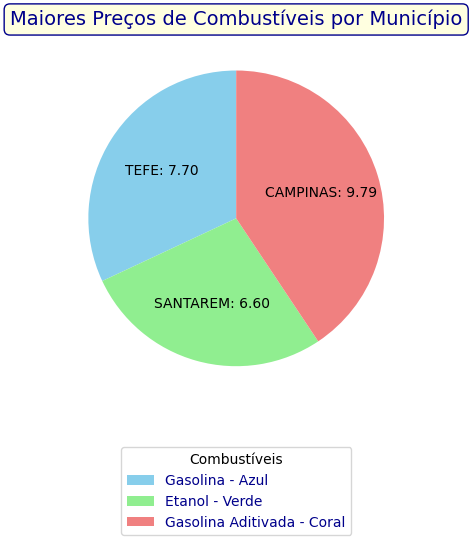

In [282]:
# Dados para o gráfico de pizza
valores = [7.7, 6.6, 9.79]
municipios = ['TEFE', 'SANTAREM', 'CAMPINAS']

# Cores correspondentes
cores = ['skyblue', 'lightgreen', 'lightcoral']

# Criar o gráfico de pizza
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(valores, labels=None, startangle=90, colors=cores, autopct='%1.2f%%')

# Adicionar rótulos customizados com os combustíveis e cores correspondentes
labels = ['Gasolina - Azul', 'Etanol - Verde', 'Gasolina Aditivada - Coral']
ax.legend(patches, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), title='Combustíveis', labelcolor='darkblue')

# Substituir porcentagens pelos valores dos combustíveis e nomes dos municípios
for text, valor, municipio in zip(autotexts, valores, municipios):
    text.set_text(f'{municipio}: {valor:.2f}')

# Adicionar título com cor diferente
title = ax.set_title('Maiores Preços de Combustíveis por Município', fontsize=14, color='darkblue')
plt.setp(title, bbox=dict(facecolor='lightyellow', edgecolor='darkblue', boxstyle='round,pad=0.3'))

# Exibir o gráfico
plt.show()

# <font color = "#EE82EE"> 7. Qual a região que possui o maior valor médio da gasolina?

In [283]:
import pandas as pd

max_gaso = df[['Valor de Venda']].groupby([df['Regiao - Sigla'],df['Produto']]).mean()

max_gaso

Valor de Venda
Regiao - Sigla Produto                           
CO             ETANOL                    3.479649
               GASOLINA                  5.580768
               GASOLINA ADITIVADA        5.756828
N              ETANOL                    4.584460
               GASOLINA                  6.171947
               GASOLINA ADITIVADA        6.321336
NE             ETANOL                    4.249076
               GASOLINA                  5.686899
               GASOLINA ADITIVADA        5.828828
S              ETANOL                    4.078209
               GASOLINA                  5.687915
               GASOLINA ADITIVADA        5.845782
SE             ETANOL                    3.572342
               GASOLINA                  5.564621
               GASOLINA ADITIVADA        5.798548

In [284]:
questao7 = max_gaso.query('Produto == "GASOLINA"').sort_values('Valor de Venda', ascending=False)

In [285]:
questao7.head(1)

,,Valor de Venda
Regiao - Sigla,Produto,
N,GASOLINA,6.171947


# <font color = "#EE82EE"> 8. Qual a região que possui o menor valor médio do etanol?

In [286]:
import pandas as pd

min_eta = df[['Valor de Venda']].groupby([df['Regiao - Sigla'],df['Produto']]).mean()

min_eta

Valor de Venda
Regiao - Sigla Produto                           
CO             ETANOL                    3.479649
               GASOLINA                  5.580768
               GASOLINA ADITIVADA        5.756828
N              ETANOL                    4.584460
               GASOLINA                  6.171947
               GASOLINA ADITIVADA        6.321336
NE             ETANOL                    4.249076
               GASOLINA                  5.686899
               GASOLINA ADITIVADA        5.828828
S              ETANOL                    4.078209
               GASOLINA                  5.687915
               GASOLINA ADITIVADA        5.845782
SE             ETANOL                    3.572342
               GASOLINA                  5.564621
               GASOLINA ADITIVADA        5.798548

In [287]:
questao8 = min_eta.query('Produto == "ETANOL"').sort_values('Valor de Venda')

In [288]:
questao8.head(1)

,,Valor de Venda
Regiao - Sigla,Produto,
CO,ETANOL,3.479649


# <font color = "#EE82EE"> 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?


In [289]:
questao9 = df.groupby(['Regiao - Sigla','Data da Coleta', 'Produto'])['Valor de Venda'].mean()

questao9 = pd.DataFrame(questao9)

questao9 = questao9['Valor de Venda'].unstack()
questao9E = pd.DataFrame(questao9['ETANOL'].unstack())
questao9G = pd.DataFrame(questao9['GASOLINA'].unstack())

In [290]:
questao9G.T.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.036362,0.140010,0.028372,0.079017
N,-0.036362,1.000000,0.111447,0.215033,0.162177
NE,0.140010,0.111447,1.000000,0.092184,-0.440259
S,0.028372,0.215033,0.092184,1.000000,-0.071477
SE,0.079017,0.162177,-0.440259,-0.071477,1.000000


In [291]:
questao9E.T.corr()

Regiao - Sigla,CO,N,NE,S,SE
Regiao - Sigla,,,,,
CO,1.000000,-0.074046,0.292111,-0.005159,0.105346
N,-0.074046,1.000000,0.077338,-0.195396,0.104482
NE,0.292111,0.077338,1.000000,-0.143012,0.116131
S,-0.005159,-0.195396,-0.143012,1.000000,0.341813
SE,0.105346,0.104482,0.116131,0.341813,1.000000


# <font color = "#FF4500"> 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

As bandeiras que possuem uma correlação positiva forte, indicam que os preços da gasolina tendem a aumentar quando essa bandeira está envolvida. Consequentemente, bandeiras de baixa correlação possuem tendências a queda de preço.

Além disso, a correlação NaN não indica ausência de relação, pode haver influências externas que não são capturadas pela correlação linear.

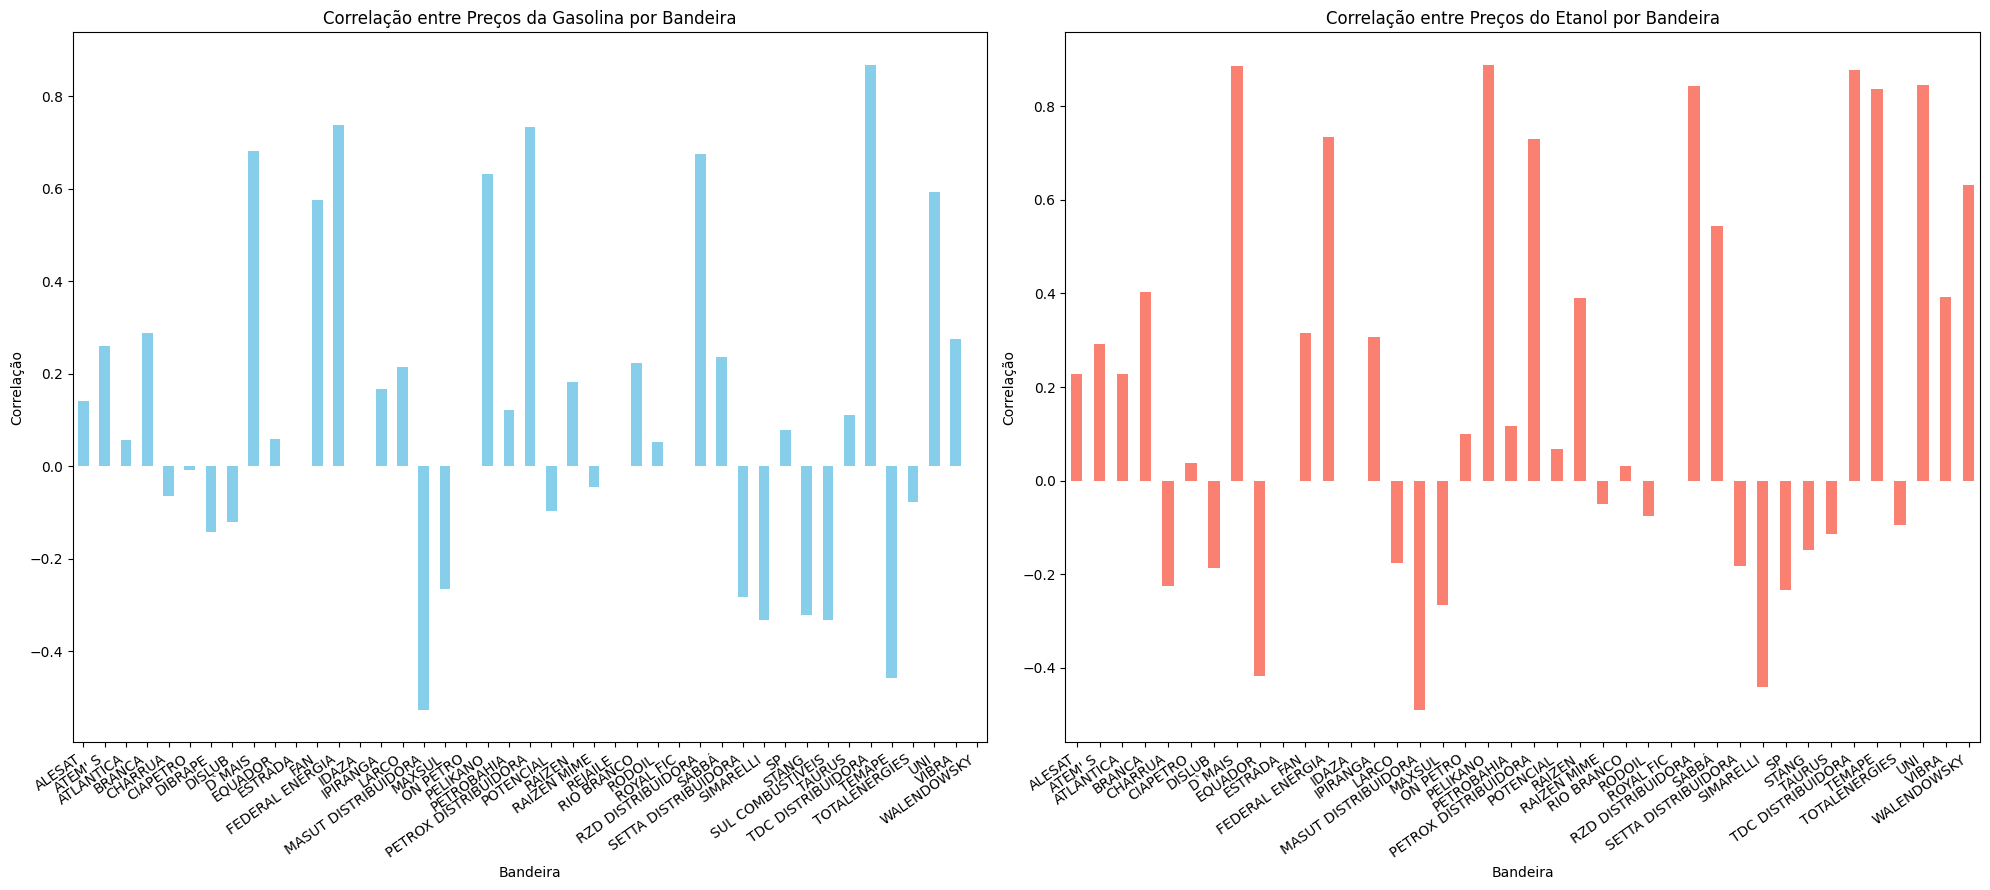

In [292]:
df_gasolina = df[df['Produto'] == 'GASOLINA']

# Agrupe os dados por 'Bandeira' e calcule a correlação para cada bandeira
correlacao_gasolina_por_bandeira = df_gasolina.groupby('Bandeira')['Valor de Venda'].apply(lambda x: x.corr(x.shift()) if len(x) > 2 and x.var() > 0 else 0)

# Filtre apenas os dados relacionados ao etanol
df_etanol = df[df['Produto'] == 'ETANOL']

# Agrupe os dados por 'Bandeira' e calcule a correlação para cada bandeira
correlacao_etanol_por_bandeira = df_etanol.groupby('Bandeira')['Valor de Venda'].apply(lambda x: x.corr(x.shift()) if len(x) > 2 and x.var() > 0 else 0)

# Criar subplots com duas colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# Plotar o gráfico de barras para gasolina
correlacao_gasolina_por_bandeira.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Correlação entre Preços da Gasolina por Bandeira')
ax1.set_xlabel('Bandeira')
ax1.set_ylabel('Correlação')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=35, ha='right')

# Plotar o gráfico de barras para etanol
correlacao_etanol_por_bandeira.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Correlação entre Preços do Etanol por Bandeira')
ax2.set_xlabel('Bandeira')
ax2.set_ylabel('Correlação')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=35, ha='right')

# Ajustar layout
plt.tight_layout()
plt.show()

# <font color = "#FF4500"> 11 . Qual a média entre a Gasolina comum e a gasolina aditivada nesse período?

In [293]:
# Filtrar o DataFrame para incluir apenas Gasolina comum e Gasolina aditivada
gasolinas_df = df[df['Produto'].isin(['GASOLINA', 'GASOLINA ADITIVADA'])]

# Calcular a média do valor de venda para as gasolinas
media_gasolinas = gasolinas_df.groupby('Produto')['Valor de Venda'].mean()

print(media_gasolinas)

Produto
GASOLINA              5.656545
GASOLINA ADITIVADA    5.844604
Name: Valor de Venda, dtype: float64


In [294]:
# Calcular a média geral entre Gasolina comum e Gasolina aditivada
media_geral = media_gasolinas.mean()

print(f"Média Geral: {media_geral:.2f}")

Média Geral: 5.75


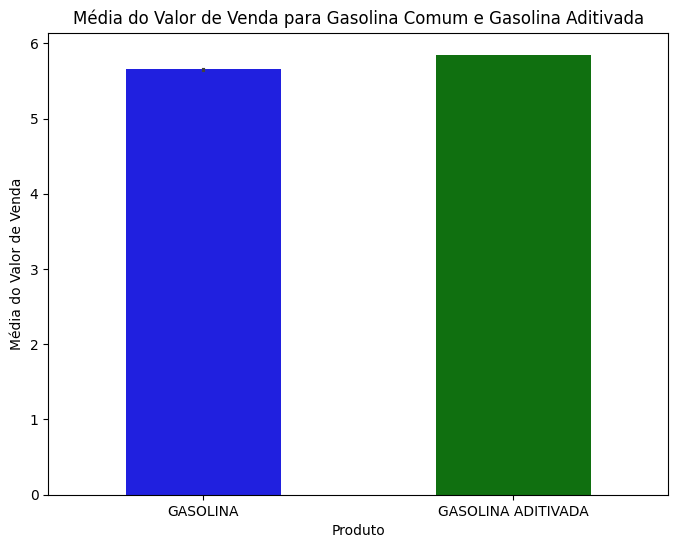

In [295]:
 #Filtrar o DataFrame para incluir apenas Gasolina comum e Gasolina aditivada
gasolinas_df = df[df['Produto'].isin(['GASOLINA', 'GASOLINA ADITIVADA'])]

# Criar gráfico de barras com cores diferentes para cada tipo de gasolina
plt.figure(figsize=(8, 6))
sns.barplot(x='Produto', y='Valor de Venda', data=gasolinas_df, width=0.5, palette={'GASOLINA': 'blue', 'GASOLINA ADITIVADA': 'green'}, legend=False, hue='Produto')
plt.title('Média do Valor de Venda para Gasolina Comum e Gasolina Aditivada')
plt.xlabel('Produto')
plt.ylabel('Média do Valor de Venda')
plt.show()

# <font color = "green"> 12. Qual é a variação percentual dos preços da gasolina e do etanol em cada estado durante os dois meses citados?

- <font color = "darkblue">Os preços da gasolina variaram entre aproximadamente 0.030% - min e 0.180% - máx, nos estados de GO e AC, respectivamente.
- <font color = "darkblue">A média geral dos estados ficou em 0.060%.



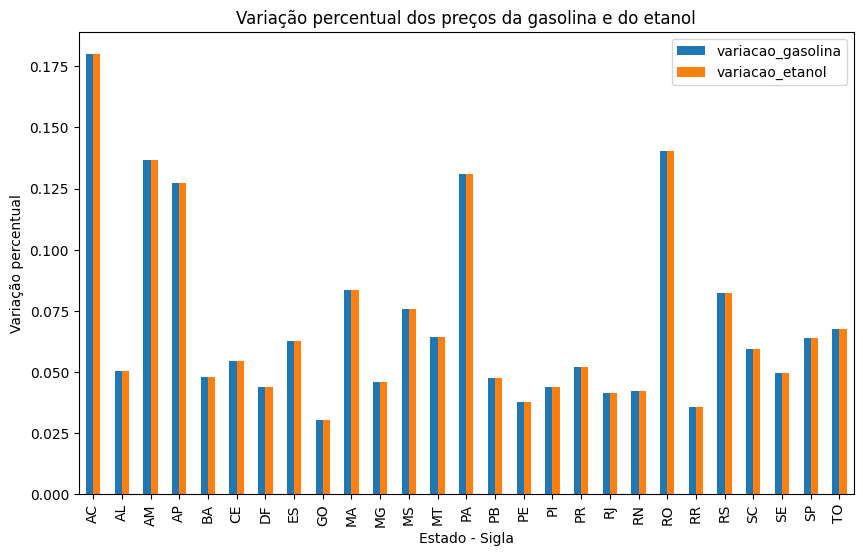

,combustivel,minimo (+-),estado_minimo,maximo (+-),estado_maximo,media_geral
0,gasolina,0.030000,GO,0.180000,AC,0.060000
1,etanol,0.030000,GO,0.180000,AC,0.060000


In [296]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


# Definindo as variáveis de preço de acordo com o valor de venda
df['preco_gasolina'] = df['Valor de Venda']
df['preco_etanol'] = df['Valor de Venda']

# Tratando valores None ou NaN e calculando a variação percentual dos preços
df['preco_gasolina'] = df['preco_gasolina'].fillna(method='ffill')
df['preco_etanol'] = df['preco_etanol'].fillna(method='ffill')
df['variacao_gasolina'] = df['preco_gasolina'].pct_change()
df['variacao_etanol'] = df['preco_etanol'].pct_change()

# Agrupando por estado e calcule a média
df_grouped = df.groupby('Estado - Sigla')[['variacao_gasolina', 'variacao_etanol']].mean()

# Criando um gráfico de barras para visualizar os resultados
ax = df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Variação percentual dos preços da gasolina e do etanol')
plt.ylabel('Variação percentual')
plt.show()

# Calculando o valor mínimo, máximo e médio para a variação da gasolina
min_gasolina = round(df_grouped['variacao_gasolina'].min(), 3)
max_gasolina = round(df_grouped['variacao_gasolina'].max(), 3)
mean_gasolina = round(df_grouped['variacao_gasolina'].mean(), 3)

# Calculando o valor mínimo, máximo e médio para a variação do etanol
min_etanol = round(df_grouped['variacao_etanol'].min(), 3)
max_etanol = round(df_grouped['variacao_etanol'].max(), 3)
mean_etanol = round(df_grouped['variacao_etanol'].mean(), 3)

# Encontrando os estados com valor mínimo e máximo para a variação da gasolina
min_state_gasolina = df_grouped['variacao_gasolina'].idxmin()
max_state_gasolina = df_grouped['variacao_gasolina'].idxmax()

# Encontrando os estados com valor mínimo e máximo para a variação do etanol
min_state_etanol = df_grouped['variacao_etanol'].idxmin()
max_state_etanol = df_grouped['variacao_etanol'].idxmax()

# Calculando a média geral para a variação da gasolina e do etanol
mean_geral_gasolina = round(df['variacao_gasolina'].mean(), 3)
mean_geral_etanol = round(df['variacao_etanol'].mean(), 3)

# Criando um novo dataframe com esses valores
resumo = pd.DataFrame({
    'combustivel': ['gasolina', 'etanol'],
    'minimo (+-)': [min_gasolina, min_etanol],
    'estado_minimo': [min_state_gasolina, min_state_etanol],
    'maximo (+-)': [max_gasolina, max_etanol],
    'estado_maximo': [max_state_gasolina, max_state_etanol],
    'media_geral': [mean_geral_gasolina, mean_geral_etanol]
})

# Adicionando um título à tabela
resumo = resumo.style.set_caption("Variação Percentual Gasolina e Etanol")

# Exibindo o dataframe
display(resumo)



# <font color = "green">13. Considerando a variação percentual dos preços da gasolina e do etanol que você calculou, houve algum estado que apresentou uma tendência constante de aumento ou diminuição nos preços durante os dois meses analisados? Se sim, quais são esses estados e qual combustível apresentou essa tendência?

resposta

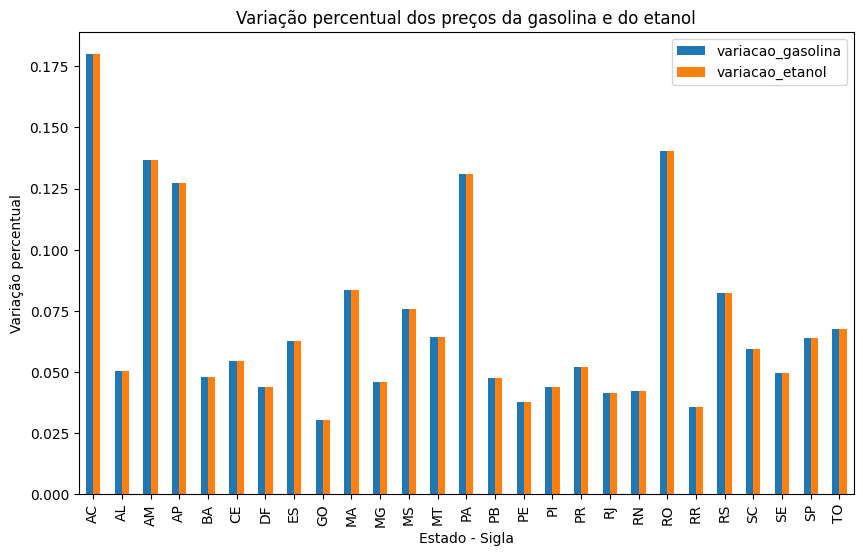

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Verificando se 'Valor de Venda' é do tipo string
if df['Valor de Venda'].dtypes == object:
    # Substituindo vírgulas por pontos e convertendo para float
    df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.').astype(float)

# Definindo as variáveis de preço de acordo com o valor de venda
df['preco_gasolina'] = df['Valor de Venda']
df['preco_etanol'] = df['Valor de Venda']

# Tratando valores None ou NaN e calculando a variação percentual dos preços
df['preco_gasolina'] = df['preco_gasolina'].fillna(method='ffill')
df['preco_etanol'] = df['preco_etanol'].fillna(method='ffill')
df['variacao_gasolina'] = df['preco_gasolina'].pct_change()
df['variacao_etanol'] = df['preco_etanol'].pct_change()

# Agrupando por estado e calcule a média
df_grouped = df.groupby('Estado - Sigla')[['variacao_gasolina', 'variacao_etanol']].mean()

# Criando um gráfico de barras para visualizar os resultados
ax = df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Variação percentual dos preços da gasolina e do etanol')
plt.ylabel('Variação percentual')
plt.show()





In [298]:
# Calculando o valor mínimo, máximo e médio para a variação da gasolina
min_gasolina = round(df_grouped['variacao_gasolina'].min(), 3)
max_gasolina = round(df_grouped['variacao_gasolina'].max(), 3)
mean_gasolina = round(df_grouped['variacao_gasolina'].mean(), 3)

# Calculando o valor mínimo, máximo e médio para a variação do etanol
min_etanol = round(df_grouped['variacao_etanol'].min(), 3)
max_etanol = round(df_grouped['variacao_etanol'].max(), 3)
mean_etanol = round(df_grouped['variacao_etanol'].mean(), 3)

# Encontrando os estados com valor mínimo e máximo para a variação da gasolina
min_state_gasolina = df_grouped['variacao_gasolina'].idxmin()
max_state_gasolina = df_grouped['variacao_gasolina'].idxmax()

# Encontrando os estados com valor mínimo e máximo para a variação do etanol
min_state_etanol = df_grouped['variacao_etanol'].idxmin()
max_state_etanol = df_grouped['variacao_etanol'].idxmax()

# Calculando a média geral para a variação da gasolina e do etanol
mean_geral_gasolina = round(df['variacao_gasolina'].mean(), 3)
mean_geral_etanol = round(df['variacao_etanol'].mean(), 3)

# Criando um novo dataframe com esses valores
resumo = pd.DataFrame({
    'combustivel': ['gasolina', 'etanol'],
    'minimo (+-)': [min_gasolina, min_etanol],
    'estado_minimo': [min_state_gasolina, min_state_etanol],
    'maximo (+-)': [max_gasolina, max_etanol],
    'estado_maximo': [max_state_gasolina, max_state_etanol],
    'media_geral': [mean_geral_gasolina, mean_geral_etanol]
})

# Adicionando um título à tabela
resumo = resumo.style.set_caption("Variação Percentual Gasolina e Etanol")

# Exibindo o dataframe
display(resumo)

,combustivel,minimo (+-),estado_minimo,maximo (+-),estado_maximo,media_geral
0,gasolina,0.030000,GO,0.180000,AC,0.060000
1,etanol,0.030000,GO,0.180000,AC,0.060000


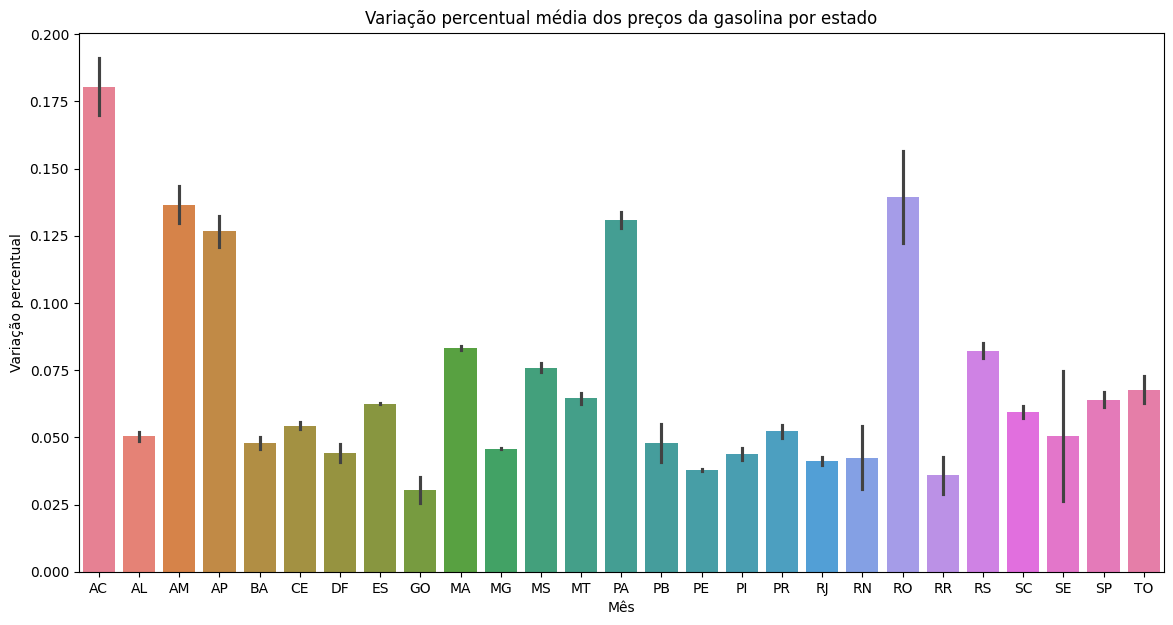

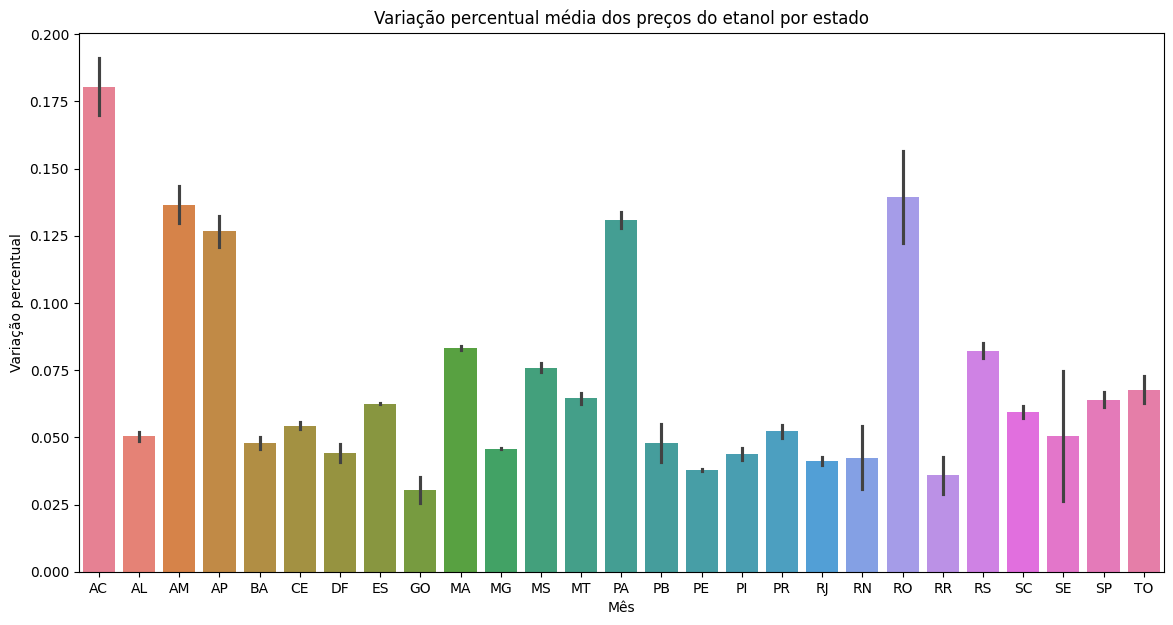

In [299]:
# Criando uma coluna para o mês
df['Mes'] = pd.to_datetime(df['Data da Coleta']).dt.month

# Agrupando por estado e mês e calculando a média
df_grouped_month = df.groupby(['Estado - Sigla', 'Mes'])[['variacao_gasolina', 'variacao_etanol']].mean().reset_index()

# Filtrando o dataframe para incluir apenas os estados que tiveram uma variação nos preços
df_grouped_month_gasolina = df_grouped_month[df_grouped_month['variacao_gasolina'] != 0]
df_grouped_month_etanol = df_grouped_month[df_grouped_month['variacao_etanol'] != 0]

# Criando um gráfico de linhas para a variação da gasolina
plt.figure(figsize=(14, 7))
sns.barplot(data=df_grouped_month_gasolina, x='Estado - Sigla', y='variacao_gasolina', hue='Estado - Sigla')
plt.title('Variação percentual média dos preços da gasolina por estado')
plt.ylabel('Variação percentual')
plt.xlabel('Mês')
plt.show()

# Criando um gráfico de linhas para a variação do etanol
plt.figure(figsize=(14, 7))
sns.barplot(data=df_grouped_month_etanol, x='Estado - Sigla', y='variacao_etanol', hue='Estado - Sigla')
plt.title('Variação percentual média dos preços do etanol por estado')
plt.ylabel('Variação percentual')
plt.xlabel('Mês')
plt.show()

#Informações Gerais do DataFrame:
O DataFrame tem um total de 101.996 entradas (linhas). As colunas variam em termos de tipo de dados, incluindo principalmente objetos (strings) e um float64. Algumas colunas têm valores nulos, como "Numero Rua", "Complemento" e "Bairro". A coluna "Valor de Compra" parece ter todos os valores nulos e a coluna "Data da Coleta" estava como objeto, convertemos para o tipo de dados de data para facilitar análises temporais.
As correções foram feitas.

Médias:

In [300]:
# Calcula a média do valor do etanol, da gasolina e da gasolina aditivada
media_etanol = df[df['Produto'] == 'ETANOL']['Valor de Venda'].mean()
media_gasolina = df[df['Produto'] == 'GASOLINA']['Valor de Venda'].mean()
media_gasolina_aditivada = df[df['Produto'] == 'GASOLINA ADITIVADA']['Valor de Venda'].mean()

# Exibe as médias
print(f'Média do valor do ETANOL: {media_etanol:.2f}')
print(f'Média do valor da GASOLINA: {media_gasolina:.2f}')
print(f'Média do valor da GASOLINA ADITIVADA: {media_gasolina_aditivada:.2f}')

Média do valor do ETANOL: 3.81
Média do valor da GASOLINA: 5.66
Média do valor da GASOLINA ADITIVADA: 5.84
